In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customer = pd.read_csv('kunden.csv', delimiter= ';')
table_customer = pd.DataFrame(customer)

visitor = pd.read_csv('besucher.csv', delimiter= ';', decimal= ',')
table_visitor = pd.DataFrame(visitor)

geodata = pd.read_csv('geo.txt', delimiter= '\t')
table_geo = pd.DataFrame(geodata)

print(table_customer)
print(table_visitor)
print(table_geo)

      Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
0        64    66894.0   88160.31         1.0  43.0   K0310
1        54    77644.0  103145.70         1.0  40.0   K1042
2        55    44341.0   80565.16         0.0  37.0   K0382
3        49    67271.0   83949.89         0.0  42.0   K0498
4        46    49832.0   93781.58         0.0  41.0   K0552
...     ...        ...        ...         ...   ...     ...
1099     70    69581.0  103751.58         1.0  51.0   K0467
1100     38    48301.0   64230.98         1.0  33.0   K0122
1101     67    63547.0  103123.57         1.0  41.0   K1045
1102     37    32686.0   49215.87         1.0  36.0   K1096
1103     55    71240.0  106132.59         1.0  49.0   K0861

[1104 rows x 6 columns]
     Alter     Einkommen  Geschlecht  Zeit KundeNr
0       30  39919.095335           0  29.0   K1814
1       41  53430.673086           0  27.0   K1544
2       64  73163.216927           0  32.0   K1945
3       41  36761.482581           0  44.0   K1825


In [5]:
 ## überschneiden sich die KundeNr

In [6]:
sum_rows = (1104+891)

print(sum_rows)

1995


In [7]:
print(table_customer.sort_values('KundeNr'))
print(table_visitor.sort_values('KundeNr'))

     Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
476     68    89437.0  114481.90         1.0  62.0   K0001
892     58    65271.0  106258.99         1.0  44.0   K0002
225     44    48195.0   85705.57         1.0  29.0   K0003
174     37    48957.0   76412.36         0.0  36.0   K0004
991     50    56621.0   92898.67         0.0  40.0   K0005
..     ...        ...        ...         ...   ...     ...
240     61    82624.0  134755.80         1.0  59.0   K1100
422     39    37905.0   61717.86         1.0  32.0   K1101
758     39    40159.0   67170.69         1.0  37.0   K1102
813     48    45545.0   75700.83         0.0  30.0   K1103
829     63    80414.0  101554.64         1.0  49.0   K1104

[1104 rows x 6 columns]
     Alter     Einkommen  Geschlecht  Zeit KundeNr
454     42  57149.498007           0  35.0   K1105
812     34  43358.564350           1  33.0   K1106
229     33  45748.426936           1  55.0   K1107
400     57  58633.969764           1  32.0   K1108
744     43  

In [8]:
table_customer_resorted = table_customer[['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Preis', 'Zeit']]
table_customer_sort_by_KNr = table_customer_resorted.sort_values('KundeNr')

table_visitor_resorted = table_visitor[['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Zeit']]
table_visitor_sort_by_KNr = table_visitor_resorted.sort_values('KundeNr')

print(table_customer_sort_by_KNr)
print(table_visitor_sort_by_KNr)

    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit
476   K0001         1.0     68    89437.0  114481.90  62.0
892   K0002         1.0     58    65271.0  106258.99  44.0
225   K0003         1.0     44    48195.0   85705.57  29.0
174   K0004         0.0     37    48957.0   76412.36  36.0
991   K0005         0.0     50    56621.0   92898.67  40.0
..      ...         ...    ...        ...        ...   ...
240   K1100         1.0     61    82624.0  134755.80  59.0
422   K1101         1.0     39    37905.0   61717.86  32.0
758   K1102         1.0     39    40159.0   67170.69  37.0
813   K1103         0.0     48    45545.0   75700.83  30.0
829   K1104         1.0     63    80414.0  101554.64  49.0

[1104 rows x 6 columns]
    KundeNr  Geschlecht  Alter     Einkommen  Zeit
454   K1105           0     42  57149.498007  35.0
812   K1106           1     34  43358.564350  33.0
229   K1107           1     33  45748.426936  55.0
400   K1108           1     57  58633.969764  32.0
744   K1109 

In [9]:
customer_merge = pd.merge(table_customer_sort_by_KNr, table_geo, on = 'KundeNr', how = 'outer')
customer_geo = customer_merge.head(1005)
visitor_merge = pd.merge(table_visitor_sort_by_KNr, table_geo, on='KundeNr', how='outer')
visitor_geo = visitor_merge.head(891)

print("outer join:\n", customer_geo)
print("outer Join:\n", visitor_geo)

outer join:
      KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit      Niederlassung
0      K0001         1.0   68.0    89437.0  114481.90  62.0            Sachsen
1      K0002         1.0   58.0    65271.0  106258.99  44.0                NRW
2      K0003         1.0   44.0    48195.0   85705.57  29.0             Hessen
3      K0004         0.0   37.0    48957.0   76412.36  36.0             Bayern
4      K0005         0.0   50.0    56621.0   92898.67  40.0             Bayern
...      ...         ...    ...        ...        ...   ...                ...
1000   K1001         0.0   55.0    66861.0   97465.12  54.0             Bayern
1001   K1002         0.0   41.0    38996.0   66237.40  28.0             Bayern
1002   K1003         1.0   55.0    60489.0  105741.80  47.0             Bayern
1003   K1004         1.0   42.0    41463.0   74976.67  43.0  Baden-Württemberg
1004   K1005         1.0   69.0    84021.0  133358.19  56.0  Baden-Württemberg

[1005 rows x 7 columns]
outer Join:
  

In [10]:
customer_isna_rows = customer_geo[customer_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(customer_isna_rows)

print(
    )
visitor_isna_rows = visitor_geo[visitor_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(visitor_isna_rows)

Zeilen mit mindestens einem NaN-Wert:
    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
23    K0024         NaN   41.0    46542.0   63477.00  40.0   
89    K0090         NaN   64.0    83452.0  133180.70  62.0   
165   K0166         NaN   53.0    49798.0   61329.51  39.0   
324   K0325         NaN   52.0    66602.0   98756.07  45.0   
789   K0790         NaN   67.0    91461.0  131748.07  66.0   

           Niederlassung  
23     Baden-Württemberg  
89         Niedersachsen  
165  Nordrhein-Westfalen  
324               Bayern  
789               Berlin  

Zeilen mit mindestens einem NaN-Wert:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Zeit, Niederlassung]
Index: []


In [11]:
counts = customer_geo['Geschlecht'].value_counts(normalize=True)
percentage_1 = counts.get(1.0, 0)
percentage_0 = counts.get(0.0, 0)

print(f"Prozentualer Anteil von 1.0: {percentage_1:.2%}")
print(f"Prozentualer Anteil von 0.0: {percentage_0:.2%}")

Prozentualer Anteil von 1.0: 63.20%
Prozentualer Anteil von 0.0: 36.80%


In [12]:
nan_indices = customer_geo[customer_geo['Geschlecht'].isnull()].index
replacement_values = np.random.choice([1.0, 0.0], size=len(nan_indices), p=[percentage_1, percentage_0])
customer_geo.loc[nan_indices, 'Geschlecht'] = replacement_values
customer_geo_noNaN = customer_geo.rename(columns={'Geschlecht': 'customer_geo_noNaN'})

customer_geo_noNaN = customer_geo
visitor_geo_noNaN = visitor_geo

print(customer_geo_noNaN)
print(visitor_geo_noNaN)

     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit      Niederlassung
0      K0001         1.0   68.0    89437.0  114481.90  62.0            Sachsen
1      K0002         1.0   58.0    65271.0  106258.99  44.0                NRW
2      K0003         1.0   44.0    48195.0   85705.57  29.0             Hessen
3      K0004         0.0   37.0    48957.0   76412.36  36.0             Bayern
4      K0005         0.0   50.0    56621.0   92898.67  40.0             Bayern
...      ...         ...    ...        ...        ...   ...                ...
1000   K1001         0.0   55.0    66861.0   97465.12  54.0             Bayern
1001   K1002         0.0   41.0    38996.0   66237.40  28.0             Bayern
1002   K1003         1.0   55.0    60489.0  105741.80  47.0             Bayern
1003   K1004         1.0   42.0    41463.0   74976.67  43.0  Baden-Württemberg
1004   K1005         1.0   69.0    84021.0  133358.19  56.0  Baden-Württemberg

[1005 rows x 7 columns]
    KundeNr  Geschlecht  Al

In [13]:
customer_isna_rows = customer_geo[customer_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(customer_isna_rows)

Zeilen mit mindestens einem NaN-Wert:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Preis, Zeit, Niederlassung]
Index: []


In [14]:
print(customer_geo.dtypes)

print(
    )

print(visitor_geo.dtypes)

KundeNr           object
Geschlecht       float64
Alter            float64
Einkommen        float64
Preis            float64
Zeit             float64
Niederlassung     object
dtype: object

KundeNr           object
Geschlecht       float64
Alter            float64
Einkommen        float64
Zeit             float64
Niederlassung     object
dtype: object


In [15]:
print("Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in customer_geo ganzzahlig?")
print(
    )
columns_are_int_a = ['Geschlecht', 'Alter', 'Zeit']

for col in columns_are_int_a:
    customer_geo_is_int = customer_geo_noNaN[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if customer_geo_is_int:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")
print(
    )
print("Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in visitor_geo ganzzahlig?")
print(
    )
columns_are_int_b = ['Geschlecht', 'Alter', 'Zeit']

for col in columns_are_int_b:
    visitor_geo_is_int = visitor_geo_noNaN[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if visitor_geo_is_int:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")

Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in customer_geo ganzzahlig?

Alle Werte in der Spalte 'Geschlecht' sind ganze Zahlen.
Alle Werte in der Spalte 'Alter' sind ganze Zahlen.
Alle Werte in der Spalte 'Zeit' sind ganze Zahlen.

Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in visitor_geo ganzzahlig?

Alle Werte in der Spalte 'Geschlecht' sind ganze Zahlen.
Alle Werte in der Spalte 'Alter' sind ganze Zahlen.
Alle Werte in der Spalte 'Zeit' sind ganze Zahlen.


In [16]:
print("Also convertieren wir diese Spalten in integer")
print(
    )
customer_geo_retype = customer_geo.astype({'Geschlecht': int, 'Alter': int, 'Zeit': int})
print(customer_geo_retype)
print(
    )
print(customer_geo_retype.dtypes)
print(
    )
visitor_geo_retype = visitor_geo.astype({'Geschlecht': int, 'Alter': int, 'Zeit': int})
print(visitor_geo_retype)
print(
    )
print(visitor_geo_retype.dtypes)

Also convertieren wir diese Spalten in integer

     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit      Niederlassung
0      K0001           1     68    89437.0  114481.90    62            Sachsen
1      K0002           1     58    65271.0  106258.99    44                NRW
2      K0003           1     44    48195.0   85705.57    29             Hessen
3      K0004           0     37    48957.0   76412.36    36             Bayern
4      K0005           0     50    56621.0   92898.67    40             Bayern
...      ...         ...    ...        ...        ...   ...                ...
1000   K1001           0     55    66861.0   97465.12    54             Bayern
1001   K1002           0     41    38996.0   66237.40    28             Bayern
1002   K1003           1     55    60489.0  105741.80    47             Bayern
1003   K1004           1     42    41463.0   74976.67    43  Baden-Württemberg
1004   K1005           1     69    84021.0  133358.19    56  Baden-Württemberg

[10

In [17]:
print("Sind alle Werte für 'Einkommen' und 'Preis' in customer_geo ganzzahlig?")
print(
    )
columns_are_int_c = ['Einkommen', 'Preis']

for col in columns_are_int_c:
    customer_geo_is_int_c = customer_geo[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if customer_geo_is_int_c:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")
print(
    )

print("Sind alle Werte für 'Einkommen' in visitor_geo ganzzahlig?")
print(
    )
columns_are_int_d = ['Einkommen']

for col in columns_are_int_d:
    visitor_geo_is_int_d = visitor_geo[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if visitor_geo_is_int_d:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")

Sind alle Werte für 'Einkommen' und 'Preis' in customer_geo ganzzahlig?

Alle Werte in der Spalte 'Einkommen' sind ganze Zahlen.
Nicht alle Werte in der Spalte 'Preis' sind ganze Zahlen.

Sind alle Werte für 'Einkommen' in visitor_geo ganzzahlig?

Nicht alle Werte in der Spalte 'Einkommen' sind ganze Zahlen.


In [18]:
print("Welchen Datentyp haben 'Einkommen' und 'Preis'?")
print(
    )
print(customer_geo_retype.dtypes)

Welchen Datentyp haben 'Einkommen' und 'Preis'?

KundeNr           object
Geschlecht         int32
Alter              int32
Einkommen        float64
Preis            float64
Zeit               int32
Niederlassung     object
dtype: object


In [19]:
print("Da Einkommen und Preis Geldwerte sind convertieren wir diese als float mit zwei Decimalstellen.")
print(
    )
customer_geo_retype['Einkommen'] = pd.to_numeric(customer_geo_retype['Einkommen'], errors='coerce')
customer_geo_retype['Preis'] = pd.to_numeric(customer_geo_retype['Preis'], errors='coerce')

customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].astype(float)
customer_geo_retype['Preis'] = customer_geo_retype['Preis'].astype(float)

customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].round(2)
customer_geo_retype['Preis'] = customer_geo_retype['Preis'].round(2)

print("Customer")
print(customer_geo_retype)
print(
    )
print(customer_geo_retype.dtypes)
print(
    )
visitor_geo_retype['Einkommen'] = pd.to_numeric(visitor_geo_retype['Einkommen'], errors='coerce')

visitor_geo_retype['Einkommen'] = visitor_geo_retype['Einkommen'].astype(float)

visitor_geo_retype['Einkommen'] = visitor_geo_retype['Einkommen'].round(2)

print("Visitor")
print(visitor_geo_retype)
print(
    )
print(visitor_geo_retype.dtypes)

Da Einkommen und Preis Geldwerte sind convertieren wir diese als float mit zwei Decimalstellen.

Customer
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit      Niederlassung
0      K0001           1     68    89437.0  114481.90    62            Sachsen
1      K0002           1     58    65271.0  106258.99    44                NRW
2      K0003           1     44    48195.0   85705.57    29             Hessen
3      K0004           0     37    48957.0   76412.36    36             Bayern
4      K0005           0     50    56621.0   92898.67    40             Bayern
...      ...         ...    ...        ...        ...   ...                ...
1000   K1001           0     55    66861.0   97465.12    54             Bayern
1001   K1002           0     41    38996.0   66237.40    28             Bayern
1002   K1003           1     55    60489.0  105741.80    47             Bayern
1003   K1004           1     42    41463.0   74976.67    43  Baden-Württemberg
1004   K1005           1 

In [20]:
print("Treten unter den Values für 'Niederlassung Doppelungen auf?")
print(
    )
Niederlassung_unique_values_customer = customer_geo_retype['Niederlassung'].unique()
print(Niederlassung_unique_values_customer)
print(
    )
Niederlassung_unique_values_visitor = visitor_geo_retype['Niederlassung'].unique()
print(Niederlassung_unique_values_visitor)
print(
    )
print("Ja."" Wir fassen NRW; Nordrhein-westfalen unter Nordrhein-westfalen und BERLIN; Berlin-Charlottenburg; Berlin-Mitte; Berlin unter Berlin zusammen.")

Treten unter den Values für 'Niederlassung Doppelungen auf?

['Sachsen' 'NRW' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Nordrhein-Westfalen' 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen'
 'Hamburg' 'Düsseldorf' 'Berlin-Charlottenburg' 'Berlin-Mitte' 'BERLIN']

['Hessen' 'Berlin' 'Niedersachsen' 'Thüringen' 'Nordrhein-Westfalen'
 'Baden-Württemberg' 'Bayern' 'Hamburg' 'Sachsen' 'Brandenburg' 'BERLIN'
 'Düsseldorf' 'NRW' 'Berlin-Charlottenburg']

Ja. Wir fassen NRW; Nordrhein-westfalen unter Nordrhein-westfalen und BERLIN; Berlin-Charlottenburg; Berlin-Mitte; Berlin unter Berlin zusammen.


In [21]:
customer_geo_retype['Niederlassung'] = customer_geo_retype['Niederlassung'].replace({
    'NRW': 'Nordrhein-Westfalen',
    'BERLIN': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin'
})

visitor_geo_retype['Niederlassung'] = visitor_geo_retype['Niederlassung'].replace({
    'NRW': 'Nordrhein-Westfalen',
    'BERLIN': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin'
})
print("Customer")
print(customer_geo_retype)
print(
    )
print("Visitor")
print(visitor_geo_retype)

Customer
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
0      K0001           1     68    89437.0  114481.90    62   
1      K0002           1     58    65271.0  106258.99    44   
2      K0003           1     44    48195.0   85705.57    29   
3      K0004           0     37    48957.0   76412.36    36   
4      K0005           0     50    56621.0   92898.67    40   
...      ...         ...    ...        ...        ...   ...   
1000   K1001           0     55    66861.0   97465.12    54   
1001   K1002           0     41    38996.0   66237.40    28   
1002   K1003           1     55    60489.0  105741.80    47   
1003   K1004           1     42    41463.0   74976.67    43   
1004   K1005           1     69    84021.0  133358.19    56   

            Niederlassung  
0                 Sachsen  
1     Nordrhein-Westfalen  
2                  Hessen  
3                  Bayern  
4                  Bayern  
...                   ...  
1000               Bayern  
1001      

In [26]:
print("Sind nun noch Doppelungen vorhanden?")
  
filtered_df_customer = customer_geo_retype[customer_geo_retype['Niederlassung'].isin(['Nordrhein-Westfalen', 'Berlin'])]
remaining_unwanted_values_customer = customer_geo_retype[customer_geo_retype['Niederlassung'].isin(['NRW', 'BERLIN', 'Berlin-Charlottenburg', 'Berlin-Mitte'])]

if not remaining_unwanted_values_customer.empty:
    print("\nUngewollte Werte gefunden:")
    print(remaining_unwanted_values_customer)
else:
    print("\nKeine ungewollten Werte gefunden.")

filtered_df_visitor = visitor_geo_retype[visitor_geo_retype['Niederlassung'].isin(['Nordrhein-Westfalen', 'Berlin'])]
remaining_unwanted_values_visitor = visitor_geo_retype[visitor_geo_retype['Niederlassung'].isin(['NRW', 'BERLIN', 'Berlin-Charlottenburg', 'Berlin-Mitte'])]

if not remaining_unwanted_values_visitor.empty:
    print("\nUngewollte Werte gefunden:")
    print(remaining_unwanted_values_visitor)
else:
    print("\nKeine ungewollten Werte gefunden.")

Sind nun noch Doppelungen vorhanden?

Keine ungewollten Werte gefunden.

Keine ungewollten Werte gefunden.


In [27]:
print(visitor_geo.dtypes)

KundeNr           object
Geschlecht       float64
Alter            float64
Einkommen        float64
Zeit             float64
Niederlassung     object
dtype: object


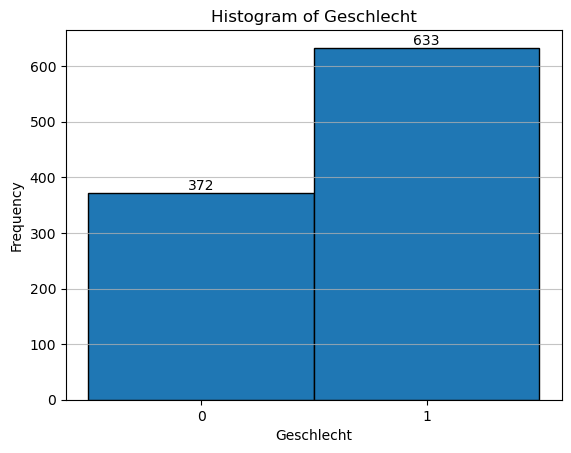

In [33]:
plt.hist(customer_geo_retype['Geschlecht'], bins=[-0.5, 0.5, 1.5], edgecolor='black')  # Bins für 0 und 1 festlegen
plt.xticks([0, 1], ['0', '1'])  # Beschriftungen der x-Achse festlegen
plt.xlabel('Geschlecht')
plt.ylabel('Frequency')
plt.title('Histogram of Geschlecht')
for i in range(2):  # 0 und 1
    count = customer_geo_retype['Geschlecht'].value_counts()[i]
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.grid(axis='y', alpha=0.75)
plt.show()

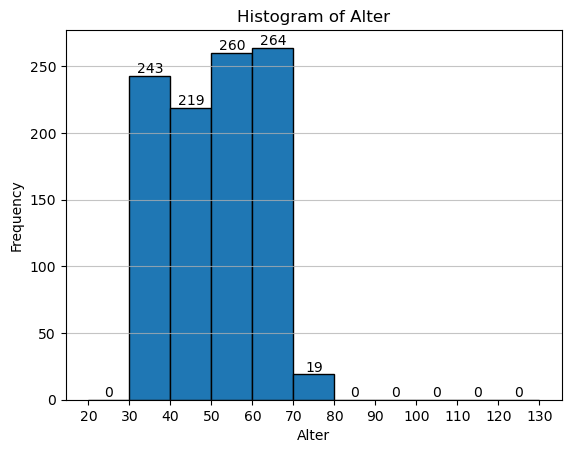

Untergrenze für Ausreißer: 8.5
Obergrenze für Ausreißer: 92.5
Ausreißer:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Preis, Zeit, Niederlassung]
Index: []
Eine Untergrenze von 8.5 macht keinen Sinn, da in Deutschland erst ab 18 Jahren Auto gefahren werden darf.
Eine Obergrenze von 92.5 macht aus unserer Sicht Sinn, da eine so alte Person bestimmt nicht mehr Auto fahren würden, aber in Einzelfällen ein Auto für eine andere Person Kaufen könnte.
In unserem Fall macht dieses Vorgehen die beiden einzigen über 80 liegenden Altersangaben zu Ausreißern.

Da wir eine moderat linksschiefe und extrem Rechtssteile verteilung vorliegen haben, ersetzen wir beide Werte mit dem Median


In [66]:
n, bins, patches = plt.hist(customer_geo_retype['Alter'], bins=range(20, 140, 10), edgecolor='black')  # Bins von 15 bis 135 in 10er-Schritten festlegen
plt.xticks(range(20, 140, 10))  # 10er-Schritte auf der x-Achse festlegen
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogram of Alter')

# Anzahl der Werte über jedem Balken anzeigen
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)  # Gitterlinien hinzufügen
plt.show()

q1 = customer_geo_retype['Alter'].quantile(0.25)
q3 = customer_geo_retype['Alter'].quantile(0.75)
iqr = q3 - q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifizieren von Ausreißern
outliers = customer_geo_retype[(customer_geo_retype['Alter'] < lower_bound) | (customer_geo_retype['Alter'] > upper_bound)]

print("Untergrenze für Ausreißer:", lower_bound)
print("Obergrenze für Ausreißer:", upper_bound)
print("Ausreißer:")
print(outliers)
print("Eine Untergrenze von 8.5 macht keinen Sinn, da in Deutschland erst ab 18 Jahren Auto gefahren werden darf.")
print("Eine Obergrenze von 92.5 macht aus unserer Sicht Sinn, da eine so alte Person bestimmt nicht mehr Auto fahren würden, aber in Einzelfällen ein Auto für eine andere Person Kaufen könnte.")
print("In unserem Fall macht dieses Vorgehen die beiden einzigen über 80 liegenden Altersangaben zu Ausreißern.")
print(
)
print("Da wir eine moderat linksschiefe und extrem Rechtssteile verteilung vorliegen haben, ersetzen wir beide Werte mit dem Median")    


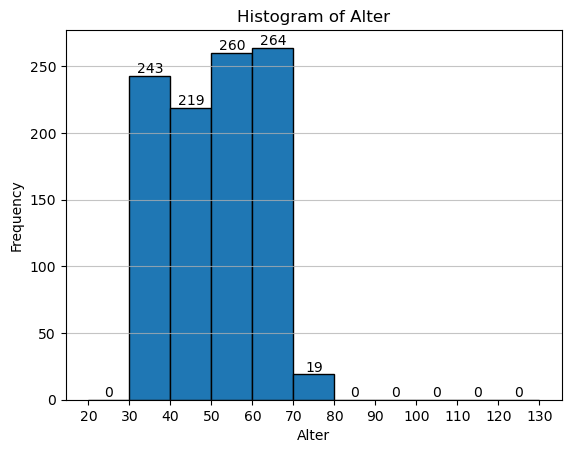

In [60]:
median = customer_geo_retype['Alter'].median()

# Berechnung des Interquartilsabstands (IQR) für die Spalte 'Alter'
q1 = customer_geo_retype['Alter'].quantile(0.25)
q3 = customer_geo_retype['Alter'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

customer_geo_retype['Alter'] = customer_geo_retype['Alter'].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

n, bins, patches = plt.hist(customer_geo_retype['Alter'], bins=range(20, 140, 10), edgecolor='black')  
plt.xticks(range(20, 140, 10))
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogram of Alter')
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

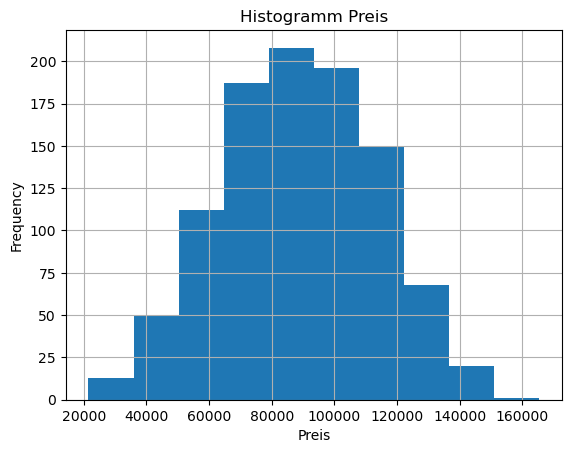

In [77]:
customer_geo_retype['Preis'].hist()
plt.xlabel('Preis')
plt.ylabel('Frequency')
plt.title('Histogramm Preis')
plt.show()

In [88]:
print(visitor_geo.min())
print(customer_geo.describe())

KundeNr                 K1105
Geschlecht                0.0
Alter                    30.0
Einkommen        10802.033307
Zeit                      3.0
Niederlassung          BERLIN
dtype: object
        Geschlecht        Alter     Einkommen          Preis         Zeit
count  1005.000000  1005.000000  1.005000e+03    1005.000000  1005.000000
mean      0.629851    50.449751  1.053740e+06   88754.552129    44.346269
std       0.483085    12.265843  3.154217e+07   24519.809579    10.859364
min       0.000000    30.000000  1.454700e+04   21471.650000    12.000000
25%       0.000000    40.000000  4.666400e+04   70342.950000    37.000000
50%       1.000000    51.000000  5.901100e+04   88810.940000    44.000000
75%       1.000000    61.000000  7.021200e+04  106934.760000    52.000000
max       1.000000   120.000000  1.000000e+09  165482.310000    80.000000


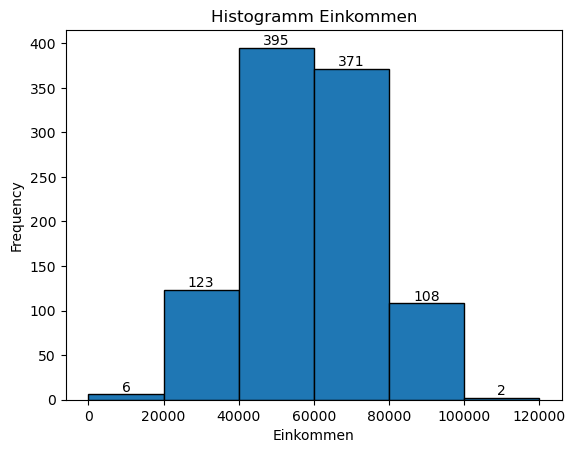

1003 der 1004 Angaben zum Einkommen bewegen sich zwischen 14547 € und 107689€ und sind realistisch
Einer liegt bei 1000000000. Diesen stufen wir als Ausreißer ein.
Er kann eine Fehlangaben, ein Datenverarbeitungsfehler oder ein extremer Einzelfall sein.


In [90]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000]  # Beispiel für Einkommensintervalle

plt.hist(customer_geo_retype['Einkommen'], bins=bins, edgecolor='black')

plt.xlabel('Einkommen')
plt.ylabel('Frequency')
plt.title('Histogramm Einkommen')
for i in range(len(bins)-1):
    count = ((customer_geo_retype['Einkommen'] >= bins[i]) & (customer_geo_retype['Einkommen'] < bins[i+1])).sum()
    plt.text((bins[i] + bins[i+1]) / 2, count, str(count), ha='center', va='bottom')

plt.show()

print("1003 der 1004 Angaben zum Einkommen bewegen sich zwischen 14547 € und 107689€ und sind realistisch")
print("Einer liegt bei 1000000000. Diesen stufen wir als Ausreißer ein.")
print("Er kann eine Fehlangaben, ein Datenverarbeitungsfehler oder ein extremer Einzelfall sein.")

In [94]:
valid_mean = customer_geo_retype[(customer_geo_retype['Einkommen'] >= 0) & (customer_geo_retype['Einkommen'] <= 500000)]['Einkommen'].mean()

# Ersetzen der Ausreißer durch den Durchschnitt
customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].apply(lambda x: valid_mean if x < 0 or x > 500000 else x)

# Drucken der ersetzen Zeilen (Ausreißer)
replaced_values = customer_geo_retype[(customer_geo_retype['Einkommen'] < 0) | (customer_geo_retype['Einkommen'] > 500000)]

# Ergebnis anzeigen
print("\nDataFrame nach der Ersetzung:")
print(customer_geo_retype.describe())



DataFrame nach der Ersetzung:
        Geschlecht        Alter      Einkommen          Preis         Zeit
count  1005.000000  1005.000000    1005.000000    1005.000000  1005.000000
mean      0.629851    50.332338   58774.130348   88754.552129    44.346269
std       0.483085    11.965546   16580.982844   24519.809579    10.859364
min       0.000000    30.000000   14547.000000   21471.650000    12.000000
25%       0.000000    40.000000   46664.000000   70342.950000    37.000000
50%       1.000000    51.000000   59011.000000   88810.940000    44.000000
75%       1.000000    61.000000   70138.000000  106934.760000    52.000000
max       1.000000    70.000000  107689.000000  165482.310000    80.000000


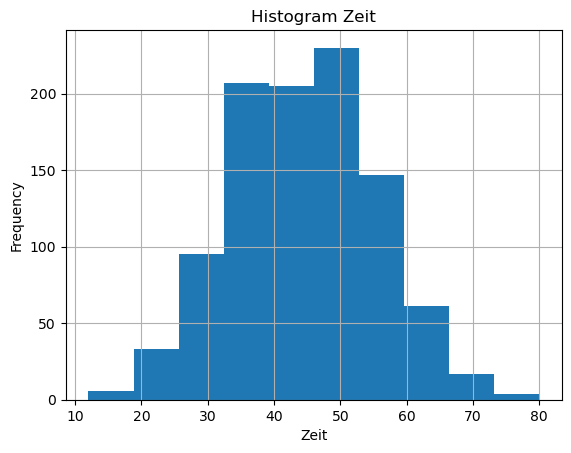

In [68]:
customer_geo_retype['Zeit'].hist()
plt.xlabel('Zeit')
plt.ylabel('Frequency')
plt.title('Histogram Zeit')
plt.show()